In [104]:
import scvelo as scv
import scanpy as sc
import cellrank as cr
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
import scipy
import time
import os
import pandas as pd
import seaborn as sns
import decoupler as dc
import omnipath
scv.settings.verbosity = 0
scv.settings.set_figure_params('scvelo',dpi_save = 300)
rcParams['figure.figsize'] = 10,10
cr.settings.verbosity = 0


In [105]:
adata = sc.read("RNA_velocity/adata_sce_hvg.h5ad")

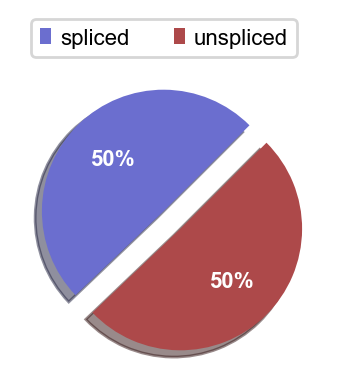

In [106]:
scv.pl.proportions(adata)#, save=True)

##### subset adata for control (DM) and treated cells (EP) respectively

In [107]:
DM = adata[adata.obs['condition'].isin(['DMSO'])]
EP = adata[adata.obs['condition'].isin(['EPZ'])]

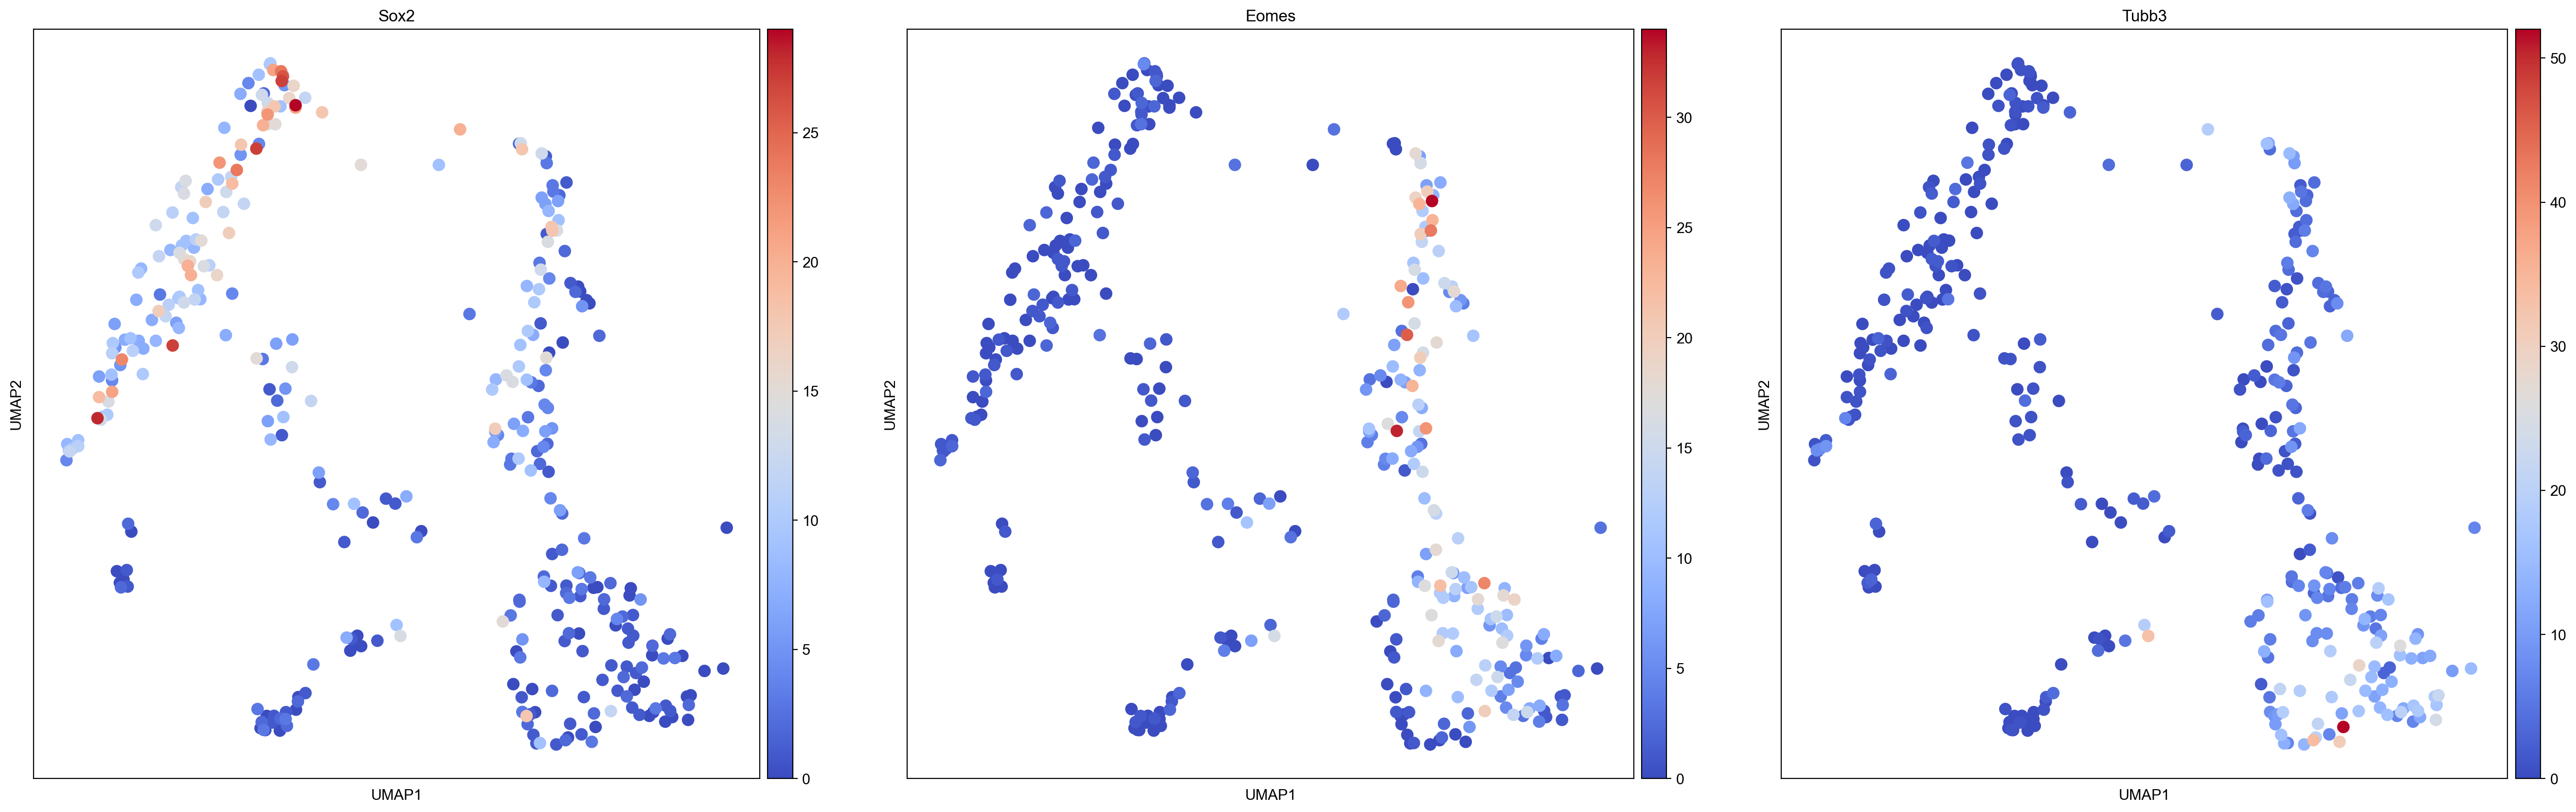

In [108]:
sc.pl.umap(DM, color=['Sox2', 'Eomes', 'Tubb3' ], layer='spliced', cmap="coolwarm")

In [ ]:
scv.pp.filter_and_normalize(DM, n_top_genes=5000) 
scv.pp.moments(DM,n_neighbors=30, n_pcs=30)
scv.tl.recover_dynamics(DM, n_jobs=-1)
scv.tl.velocity(DM, mode='dynamical')
scv.tl.velocity_graph(DM)


In [ ]:
scv.pp.filter_and_normalize(EP, n_top_genes=5000) 
scv.pp.moments(EP,n_neighbors=30, n_pcs=30)
scv.tl.recover_dynamics(EP, n_jobs=-1)
scv.tl.velocity(EP, mode='dynamical')
scv.tl.velocity_graph(EP)


/opt/homebrew/Caskroom/miniforge/base/envs/SCANPY_1.9.1_PC/lib/python3.9/site-packages/scanpy/_settings.py:447: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  IPython.display.set_matplotlib_formats(*ipython_format)


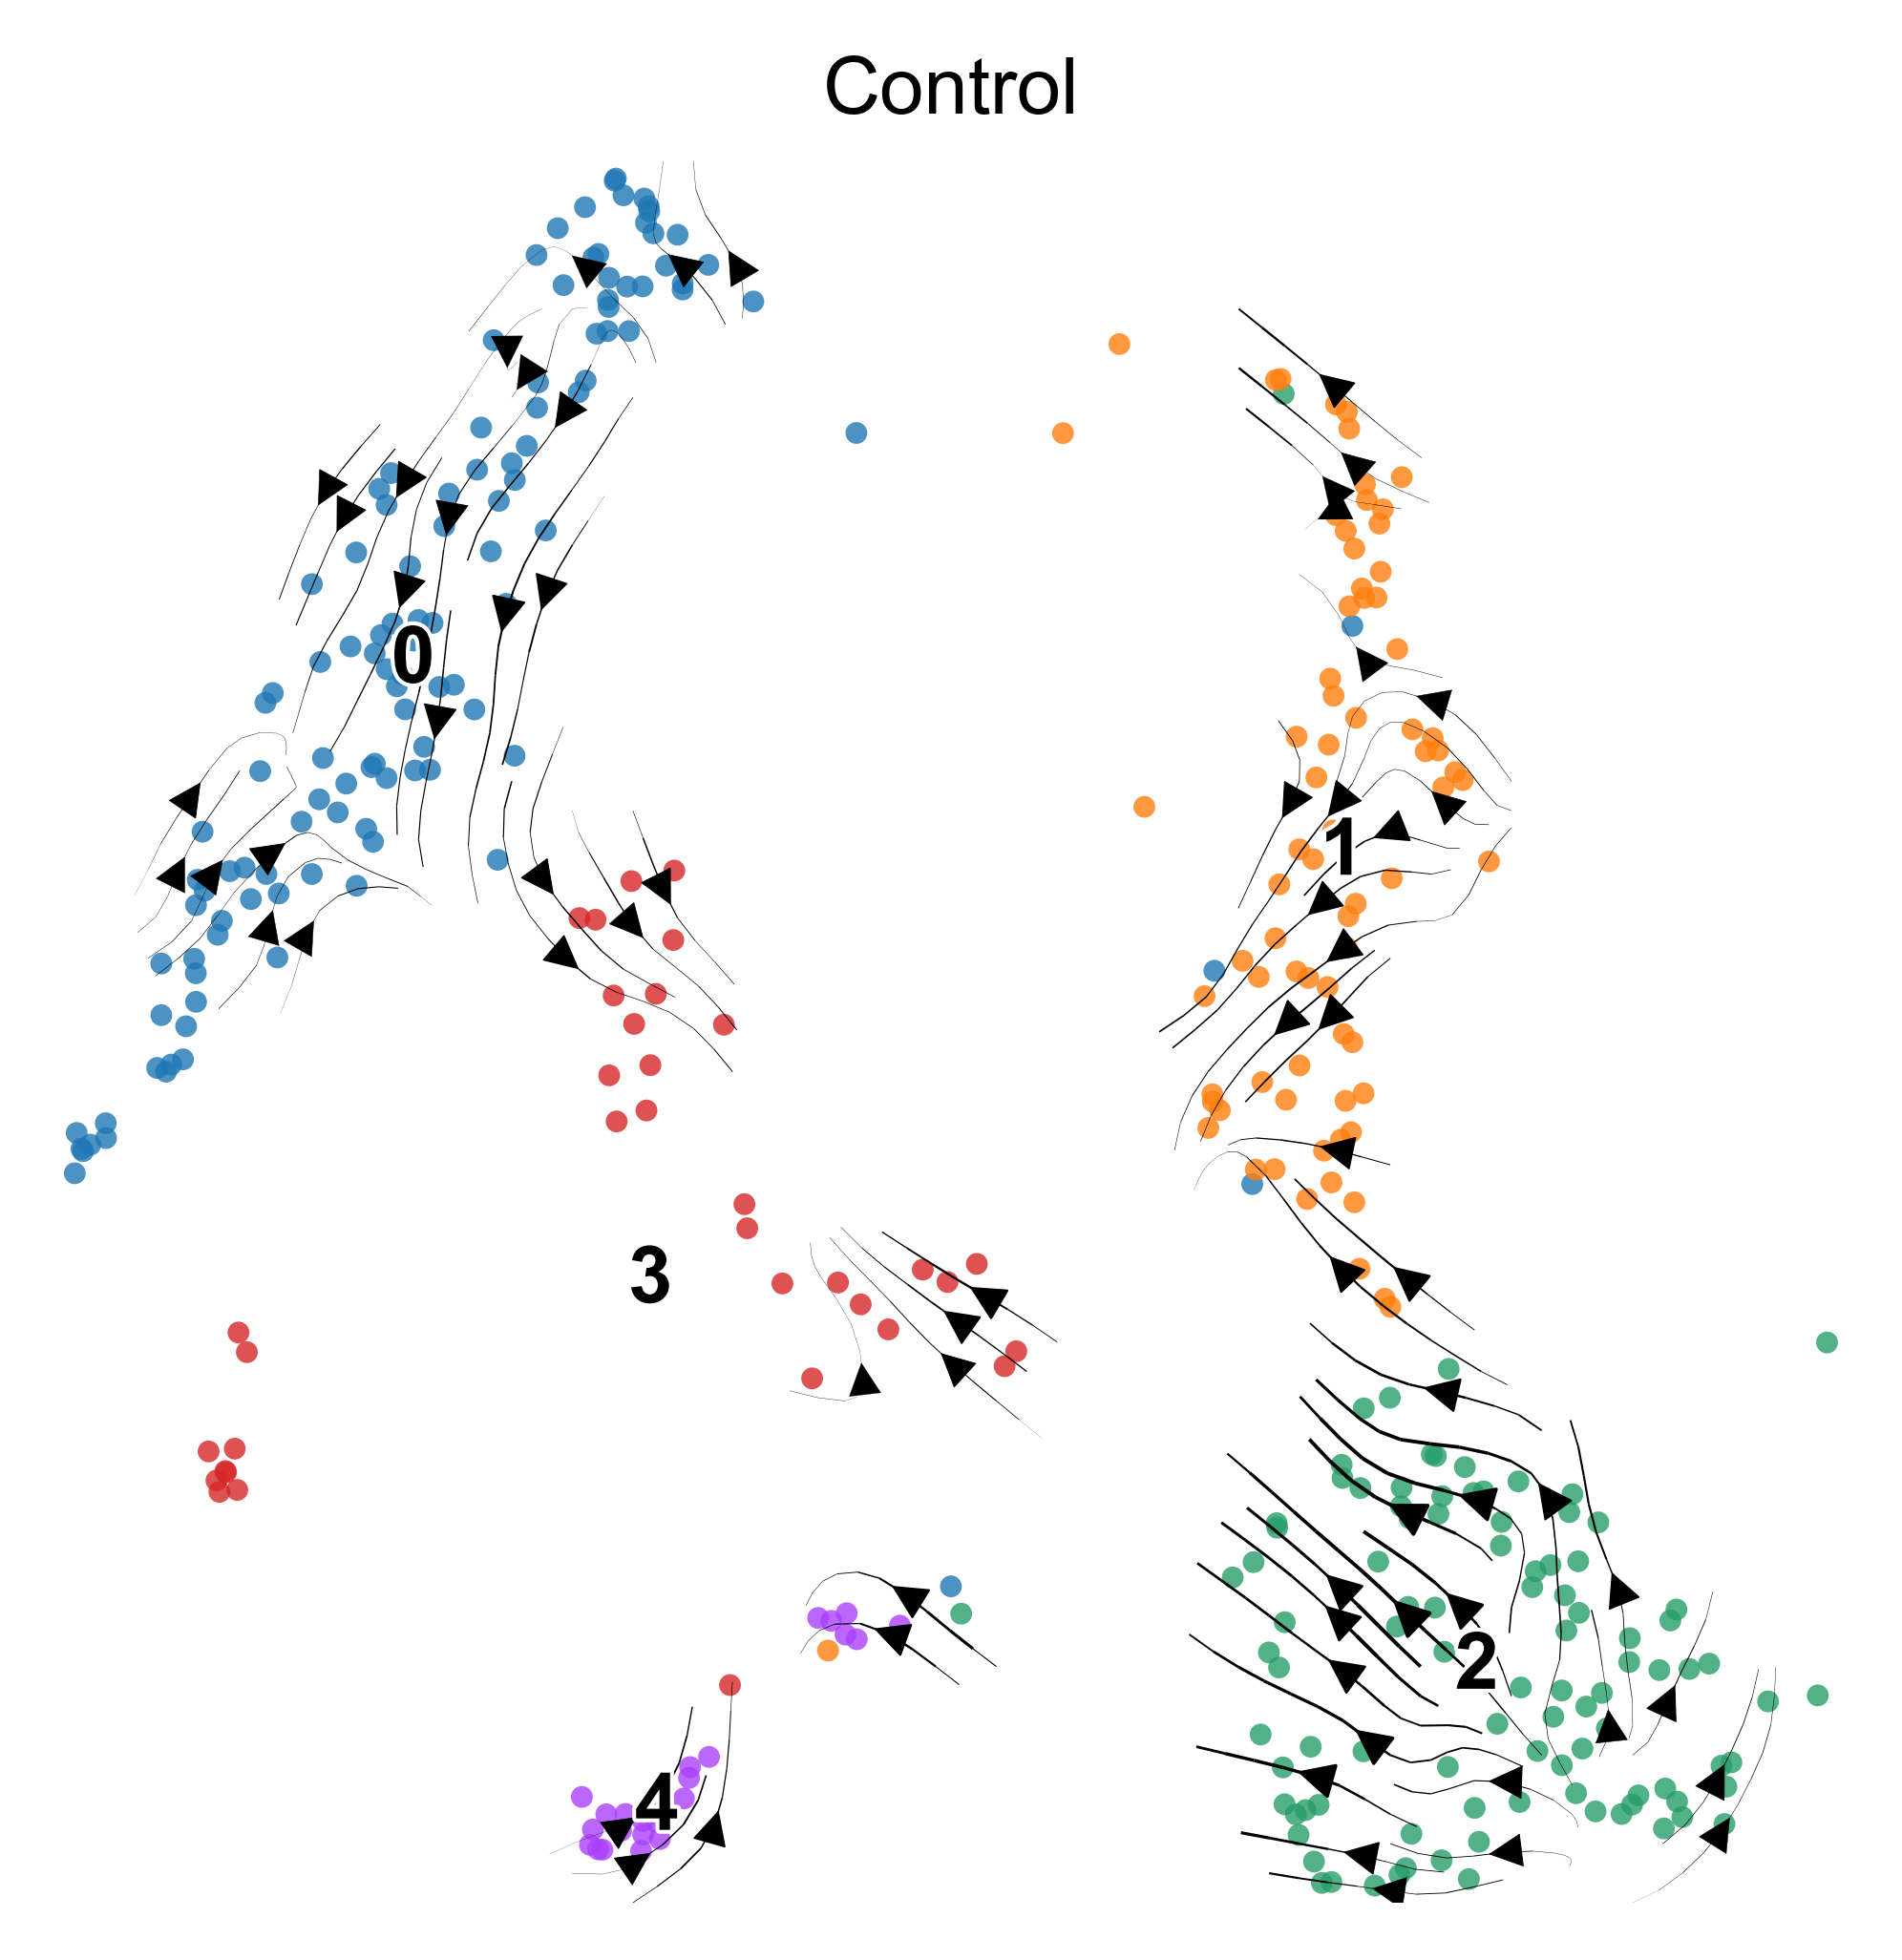

In [112]:
sc.set_figure_params(dpi = 300, dpi_save = 600, fontsize = 10)
ax.grid(False)
plt.rcParams['axes.grid'] = False
scv.pl.velocity_embedding_stream(DM, basis='umap', linewidth=.25, size=30, color=['seurat_clusters'], title='Control', alpha=0.8, legend_fontsize=10, smooth=0.8, min_mass=3.5)#, save= "_velocity_EPZ.png")


/opt/homebrew/Caskroom/miniforge/base/envs/SCANPY_1.9.1_PC/lib/python3.9/site-packages/scanpy/_settings.py:447: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  IPython.display.set_matplotlib_formats(*ipython_format)


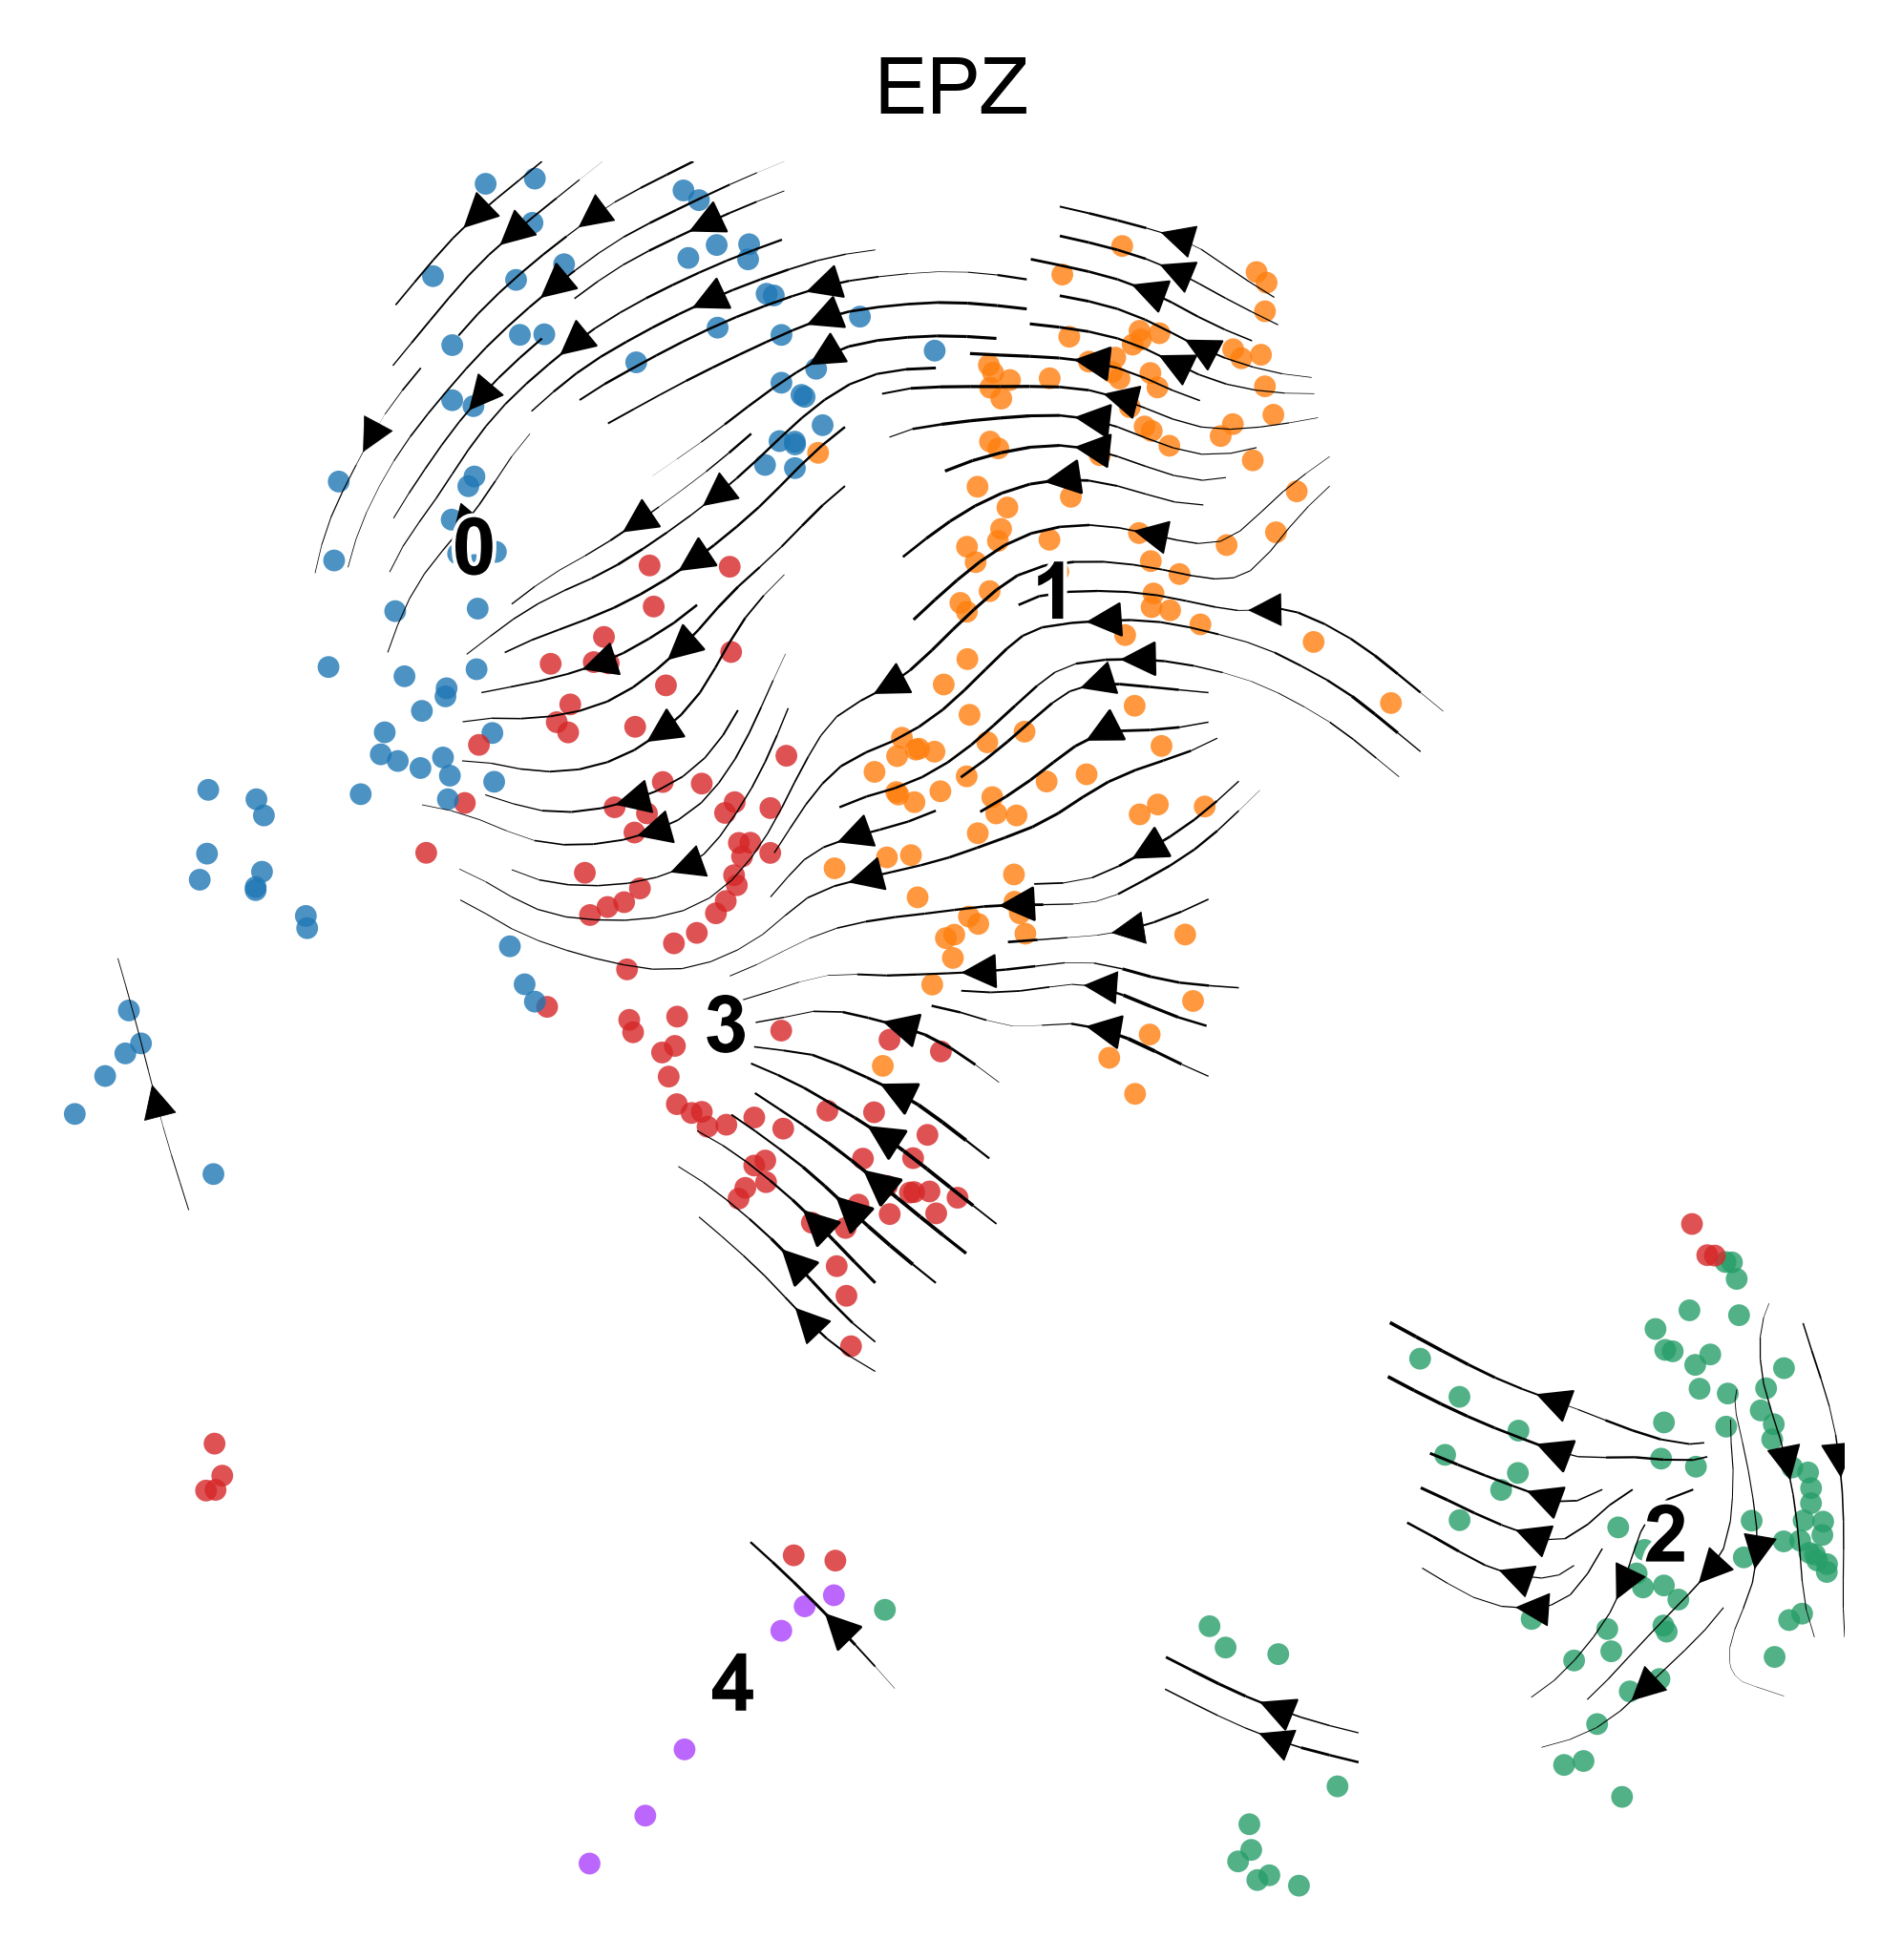

In [116]:
sc.set_figure_params(dpi = 300, dpi_save = 600, fontsize = 10)
ax.grid(False)
plt.rcParams['axes.grid'] = False
scv.pl.velocity_embedding_stream(EP, basis='umap', linewidth=.25, size=30, color=['seurat_clusters'], title='EPZ', alpha=0.8, legend_fontsize=10, smooth=0.8, min_mass=3.5)#, save= "_velocity_EPZ.png")


In [117]:
scv.tl.rank_dynamical_genes(DM, groupby ='seurat_clusters')
df = scv.get_df(DM, 'rank_dynamical_genes/names')
# df.to_csv('figures/velocity_driver_genes_DMSO.csv')
df.head()

,0,1,2,3,4
0,Plagl1,Elavl4,Cbfa2t3,Zfp36l1,Grb10
1,Sox2,Eomes,Elavl4,Grb10,Slc11a1
2,4933411E06Rik,Srrm4,Igfbpl1,Dct,Slc7a5
3,Zfp36l1,Igfbpl1,Dcx,Tcf7l1,Srrm4
4,Grb10,H2afz,Soga3,Cdca3,Eomes


In [118]:
scv.tl.rank_dynamical_genes(EP, groupby ='seurat_clusters')
df = scv.get_df(EP, 'rank_dynamical_genes/names')
# df.to_csv('figures/velocity_driver_genes_EPZ.csv')
df.head()

,0,1,2,3,4
0,Pbk,Tmpo,Scg3,Plpp3,Slc1a3
1,Qk,Spc24,Dcx,Rrm1,1700037C18Rik
2,H2afz,Elavl2,Nav1,Spc24,Ccna2
3,Sox11,Esco2,6330403K07Rik,Uhrf1,Kif5a
4,Spc25,Unc5d,Neurod6,Pbk,Hes5
